In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("TSLA_weekly_return_volatility.csv")
df_18 = df.loc[df["Year"] == 2018].reset_index()
df_19 = df.loc[df["Year"] == 2019].reset_index()

# data
X_train = df_18[["mean_return", "volatility"]].values
Y_train = df_18["label"].values
X_test = df_19[["mean_return", "volatility"]].values
Y_test = df_19["label"].values

#scaling
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_train)

### 1. Use the "knee" method to find out the best k.

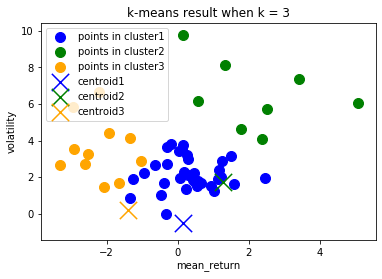

In [2]:
# k = 3
k = 3
kmeans_classifier = KMeans(n_clusters=k)
y_means = kmeans_classifier.fit_predict(X_train)
centroids = kmeans_classifier.cluster_centers_
df_18["Cluster"] = y_means

colmap = {0:"blue", 1:"green", 2:"orange"}
fig = plt.figure()
for i in range(k):
    new_df = df_18[df_18["Cluster"] == i]
    plt.scatter(new_df["mean_return"], new_df["volatility"], c=colmap[i],\
                s=100, label="points in cluster"+str(i+1))
    
for i in range(k):
    plt.scatter(centroids[i][0], centroids[i][1], \
                c=colmap[i], marker="x", s=300, label="centroid"+str(i+1))
    
# for i in range(len(df_18)):
#     x_text= df_18["mean_return"].iloc[i] + 0.05
#     y_text = df_18["volatility"].iloc[i] + 0.2
#     id_text = df_18["Week_Number"].iloc[i]
#     plt.text(x_text, y_text, s=id_text,fontsize=10)
plt.title("k-means result when k = 3")
plt.legend(loc="upper left")
plt.xlabel("mean_return")
plt.ylabel("volatility")
plt.show()

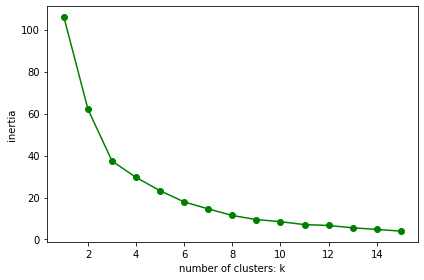

In [3]:
inertia_list = []
k_list = [k for k in range(1,16)]
for k in k_list:
    kmeans_classifier = KMeans(n_clusters=k)
    y_kmeans = kmeans_classifier.fit_predict(X_train)
    inertia = kmeans_classifier.inertia_
    inertia_list.append(inertia)
plt.plot(k_list, inertia_list, marker="o", c="green")
plt.xlabel('number of clusters: k')
plt.ylabel('inertia')
plt.tight_layout()
plt.show()

The optimal k is k=3

### 2. Examine clusters

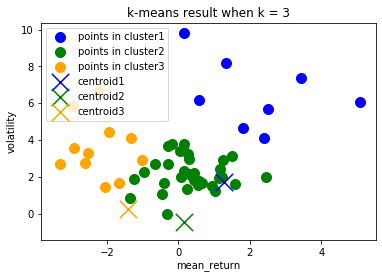

,green,red
cluster1,0.88,0.12
cluster2,0.47,0.53
cluster3,NaN,1.00


In [4]:
k = 3
kmeans_classifier = KMeans(n_clusters=k)
y_means = kmeans_classifier.fit_predict(X_test)
centroids = kmeans_classifier.cluster_centers_
df_18["Cluster"] = y_means

colmap = {0:"blue", 1:"green", 2:"orange"}
fig = plt.figure()
labels= []
for i in range(k):
    new_df = df_18[df_18["Cluster"] == i]
    label = new_df.groupby("label")["label"].count()
    labelsum = len(new_df)
    labels.append(round(label/labelsum,2))
    plt.scatter(new_df["mean_return"], new_df["volatility"], c=colmap[i],\
                s=100, label="points in cluster"+str(i+1))
    
for i in range(k):
    plt.scatter(centroids[i][0], centroids[i][1], \
                c=colmap[i], marker="x", s=300, label="centroid"+str(i+1))
    
plt.title("k-means result when k = 3")
plt.legend(loc="upper left")
plt.xlabel("mean_return")
plt.ylabel("volatility")
plt.show()    

table = pd.DataFrame(labels, index=["cluster1", "cluster2", "cluster3"])
table

Cluster 3 is a pure red cluster and cluster 2 has a high percentage of green labels.